In [1]:
#Khai báo các thư viện sử dụng
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [2]:
#đọc dữ liệu
msn = pd.read_csv('MSN.csv')
pnj = pd.read_csv('PNJ.csv')
vic = pd.read_csv('VIC.csv')
fpt = pd.read_csv('FPT.csv')

In [3]:
msn.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [4]:
pnj.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


In [5]:
vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


In [6]:
fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [7]:
msn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [8]:
#định dạng cột Date/Time 
msn['Date/Time'] = pd.to_datetime(msn['Date/Time'])
pnj['Date/Time'] = pd.to_datetime(pnj['Date/Time'])
vic['Date/Time'] = pd.to_datetime(vic['Date/Time'])
fpt['Date/Time'] = pd.to_datetime(fpt['Date/Time'])

In [9]:
msn = msn.set_index(msn['Date/Time'])
pnj = pnj.set_index(pnj['Date/Time'])
vic = vic.set_index(vic['Date/Time'])
fpt = fpt.set_index(fpt['Date/Time'])

In [10]:
msn.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
Date/Time,,,,,,,,
2017-12-25 09:15:00,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0
2017-12-25 09:16:00,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0
2017-12-25 09:18:00,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0
2017-12-25 09:20:00,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0
2017-12-25 09:21:00,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0


In [11]:
# tạo cột biến động là giá đóng cửa lần trước - giá đóng cửa hiện tại
msn['Volatility'] = msn['Close'].diff()
pnj['Volatility'] = pnj['Close'].diff()
vic['Volatility'] = vic['Close'].diff()
fpt['Volatility'] = fpt['Close'].diff()

In [12]:
msn = msn.dropna()
pnj = pnj.dropna()
vic = vic.dropna()
fpt = fpt.dropna()

In [13]:
company_list = [msn,pnj,vic,fpt]
company_name = ['MSN','PNJ','VIC','FPT']

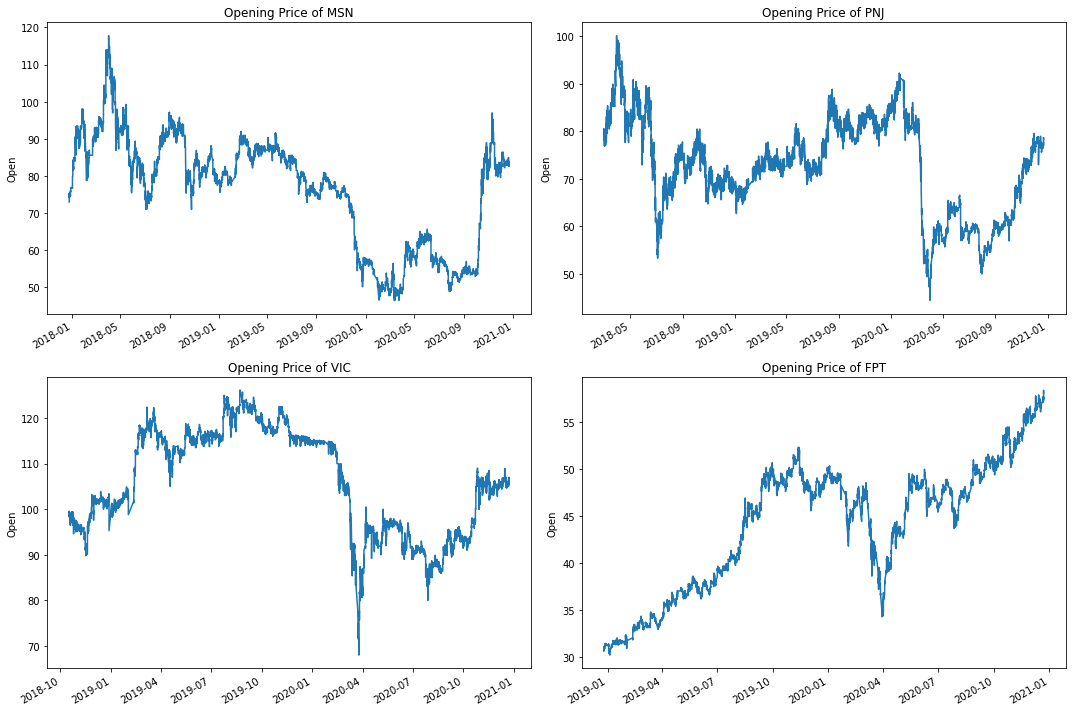

In [14]:
#Vẽ biểu đồ thể hiện giá mở cửa theo thời gian
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Open'].plot()
    plt.ylabel('Open')
    plt.xlabel(None)
    plt.title(f"Opening Price of {company_name[i - 1]}")
    
plt.tight_layout()

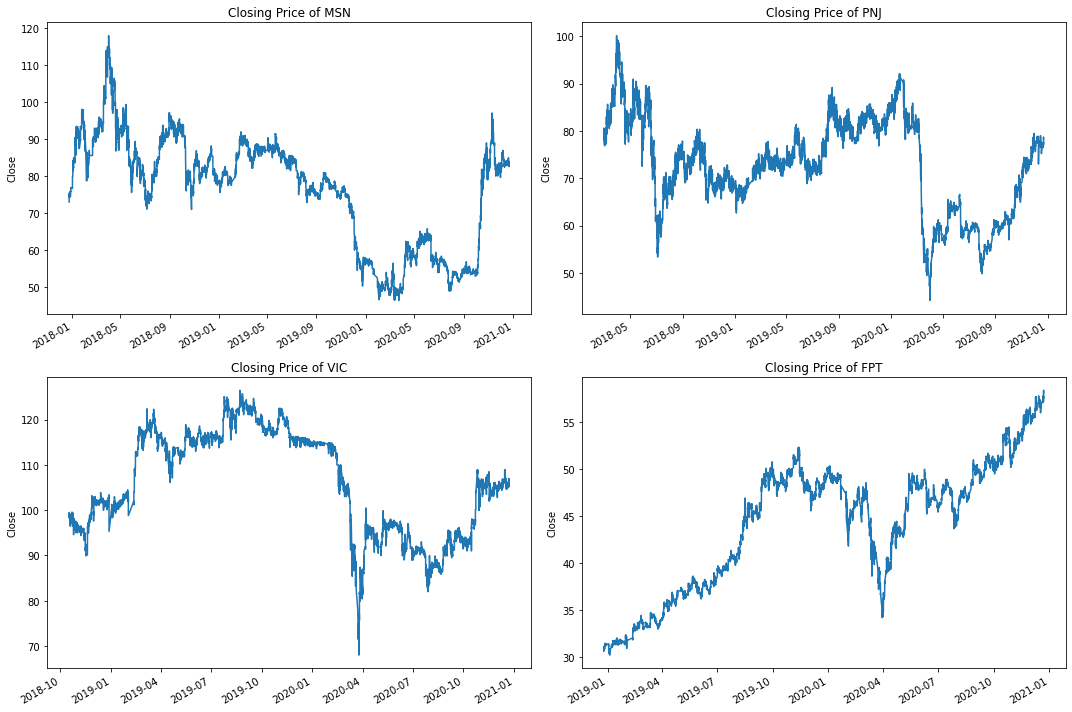

In [15]:
#Vẽ biểu đồ thể hiện giá đóng cửa theo thời gian
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

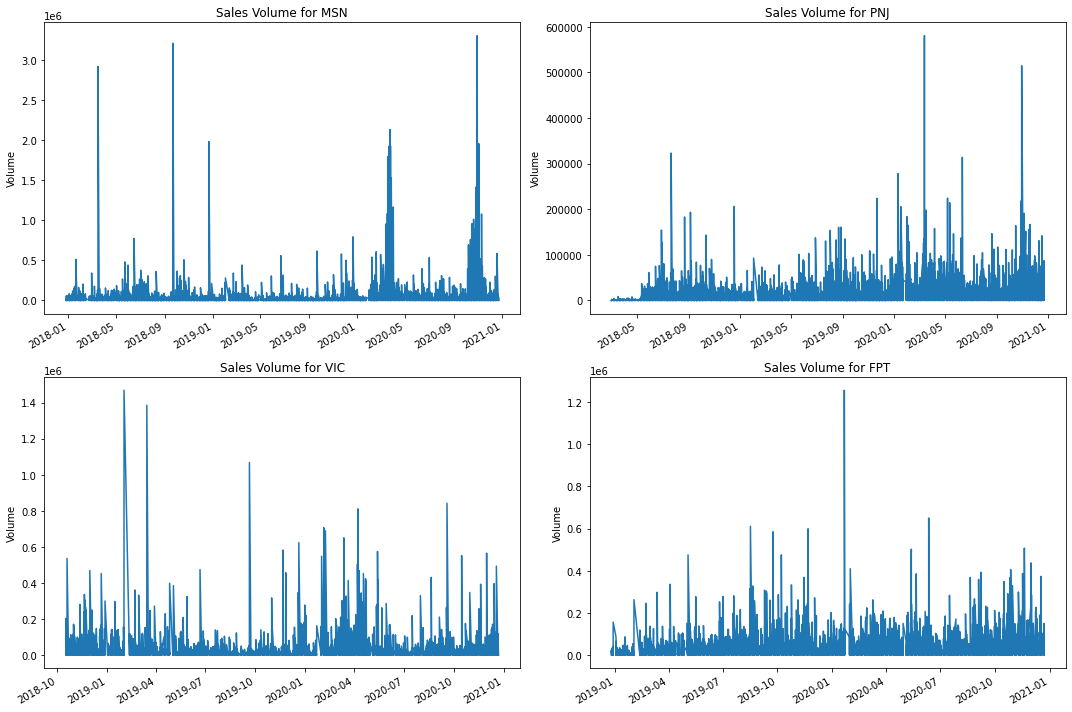

In [16]:
#Vẽ biểu đồ thể hiện lượng giao dịch theo thời gian
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

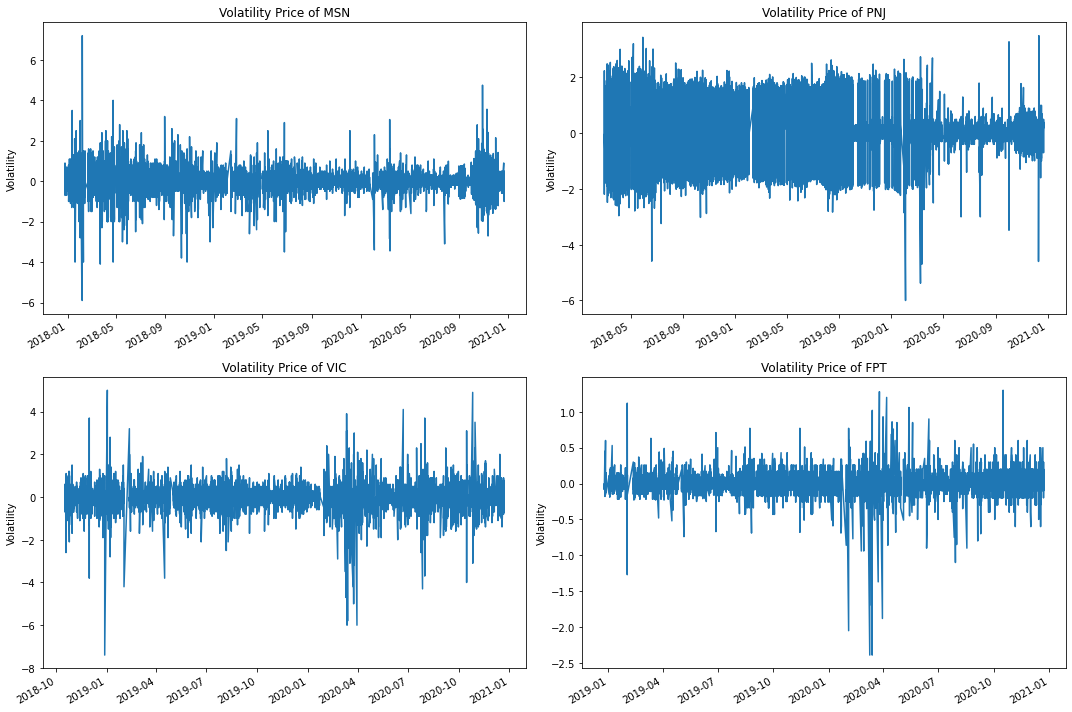

In [17]:
#Vẽ biểu đồ thể hiện độ biến động theo thời gian
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volatility'].plot()
    plt.ylabel('Volatility')
    plt.xlabel(None)
    plt.title(f"Volatility Price of {company_name[i - 1]}")
    
plt.tight_layout()

In [18]:
# Chọn độ biến động của dữ liệu cổ phiếu PNJ để xây dựng mô hình
data = pnj.filter(['Volatility'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .9 ))

training_data_len

112778

In [19]:
#Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.62631579],
       [0.54736842],
       [0.63157895],
       ...,
       [0.63157895],
       [0.62105263],
       [0.65263158]])

In [20]:
#Tạo tập training
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.62631579, 0.54736842, 0.63157895, 0.63157895, 0.62631579,
       0.63684211, 0.63157895, 0.69578947, 0.63157895, 0.63157895,
       0.64210526, 0.74526316, 0.51789474, 0.63578947, 0.62736842,
       0.60631579, 0.60631579, 0.86736842, 0.40105263, 0.67684211,
       0.63157895, 0.63157895, 0.60631579, 0.63157895, 0.63157895,
       0.63157895, 0.81157895, 0.43157895, 0.62210526, 0.62631579,
       0.62631579, 0.64210526, 0.62631579, 0.63684211, 0.63157895,
       0.8       , 0.45263158, 0.67157895, 0.60631579, 0.65684211,
       0.63157895, 0.65684211, 0.63157895, 0.63157895, 0.61157895,
       0.63157895, 0.63684211, 0.62631579, 0.63157895, 0.62631579,
       0.63157895, 0.81157895, 0.46210526, 0.62105263, 0.62210526,
       0.63157895, 0.61578947, 0.65684211, 0.63157895, 0.63157895])]
[0.631578947368421]

[array([0.62631579, 0.54736842, 0.63157895, 0.63157895, 0.62631579,
       0.63684211, 0.63157895, 0.69578947, 0.63157895, 0.63157895,
       0.64210526, 0.74526316, 0.5178

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size= 0.2, random_state =0)

In [22]:
# Tạo mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, 
          y_train,
          validation_data = (x_valid,y_valid),
          epochs=50, 
          batch_size = 128)

Epoch 1/50
705/705 [==============================] - 17s 11ms/step - loss: 0.0073 - val_loss: 0.0057
Epoch 2/50
705/705 [==============================] - 7s 9ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 3/50
705/705 [==============================] - 7s 10ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 4/50
705/705 [==============================] - 7s 9ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 5/50
705/705 [==============================] - 8s 11ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 6/50
705/705 [==============================] - 7s 9ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 7/50
705/705 [==============================] - 8s 11ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/50
705/705 [==============================] - 7s 10ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 9/50
705/705 [==============================] - 7s 9ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 10/50
705/705 [==============================] - 7s 10ms/step - loss: 0.0036 - val_loss:

In [25]:
# Tạo dữ liệu để test
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

392/392 [==============================] - 3s 5ms/step


0.25078134364332105

<ipython-input-26-d050db40f7f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


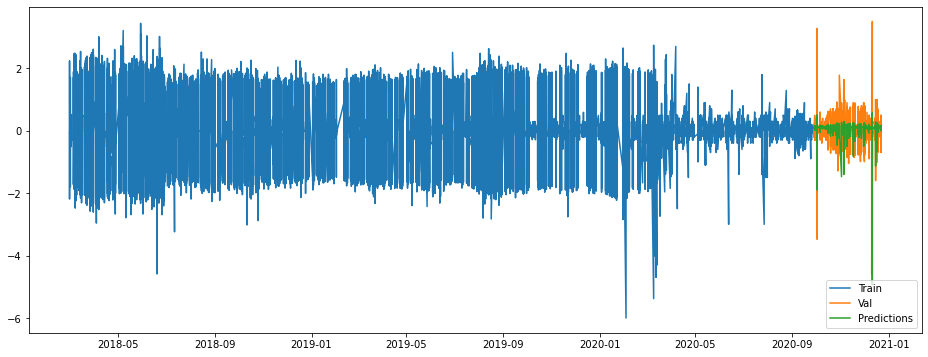

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))

plt.plot(train['Volatility'])
plt.plot(valid[['Volatility', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
valid.head()

,Volatility,Predictions
Date/Time,,
2020-09-28 09:35:00,0.0,0.108661
2020-09-28 09:36:00,-0.1,0.108414
2020-09-28 09:37:00,0.0,0.111479
2020-09-28 09:38:00,0.1,0.099580
2020-09-28 09:39:00,0.0,0.093589


# Nhận xét chung
- Do dịch Covid nên giá mở bán, giá đóng cửa giảm đáng kể vào giai đoạn nửa đầu 2020. 
- Mô hình có độ chính xác chưa cao, có thể do sự biến động giá cổ phiếu bị ảnh hưởng bởi những yếu tố khác (Covid,...) 